In [ ]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import re
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Read in the data
data = pd.read_csv("bs140513_032310.csv")
data

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [3]:
data.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [4]:
data.info

<bound method DataFrame.info of         step       customer  age gender zipcodeOri       merchant zipMerchant  \
0          0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1          0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2          0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3          0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4          0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   
...      ...            ...  ...    ...        ...            ...         ...   
594638   179  'C1753498738'  '3'    'F'    '28007'  'M1823072687'     '28007'   
594639   179   'C650108285'  '4'    'F'    '28007'  'M1823072687'     '28007'   
594640   179   'C123623130'  '2'    'F'    '28007'   'M349281107'     '28007'   
594641   179  'C1499363341'  '5'    'M'    '28007'  'M1823072687'     '28007'   
594642   179   'C616528518'  '4'    'F'    '28007'  'M1823072687'     '28007'

In [5]:
# Preprocessing steps
# remove columns with 1 constant value
data = data.drop(columns=['zipcodeOri', 'zipMerchant'])
data

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','M1823072687','es_transportation',20.53,0
594639,179,'C650108285','4','F','M1823072687','es_transportation',50.73,0
594640,179,'C123623130','2','F','M349281107','es_fashion',22.44,0
594641,179,'C1499363341','5','M','M1823072687','es_transportation',14.46,0


In [6]:
# remove comas
data['customer'] = data['customer'].str[1:-1]
data['age'] = data['age'].str[1:-1]
data['gender'] = data['gender'].str[1:-1]
data['merchant'] = data['merchant'].str[1:-1]
data['category'] = data['category'].str[1:-1]



In [7]:
# remove es_ from "category"
data['category'] = data['category'].str.replace('es_', '')

# remove Unknown from Gender
data = data[data['gender'] != 'U'].copy()

# Replace U in Age with "7"
data.loc[data['age'] == 'U', 'age'] = '7'

In [8]:
# Create Amount Thresholds
conditions = [
    (data['amount'] <= 500),
    (data['amount'] > 500) & (data['amount'] <= 1000),
    (data['amount'] > 1000) & (data['amount'] <= 1500),
    (data['amount'] > 1500) & (data['amount'] <= 2000),
    (data['amount'] > 2000) & (data['amount'] <= 2500),
    (data['amount'] > 2500) & (data['amount'] <= 3000),
    (data['amount'] > 3000)
]
order = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '>3000']

data['amount_thresh'] = np.select(conditions, order, default=np.nan)

# Check data
print(data.head())

   step     customer age gender     merchant        category  amount  fraud  \
0     0  C1093826151   4      M   M348934600  transportation    4.55      0   
1     0   C352968107   2      M   M348934600  transportation   39.68      0   
2     0  C2054744914   4      F  M1823072687  transportation   26.89      0   
3     0  C1760612790   3      M   M348934600  transportation   17.25      0   
4     0   C757503768   5      M   M348934600  transportation   35.72      0   

  amount_thresh  
0         0-500  
1         0-500  
2         0-500  
3         0-500  
4         0-500  


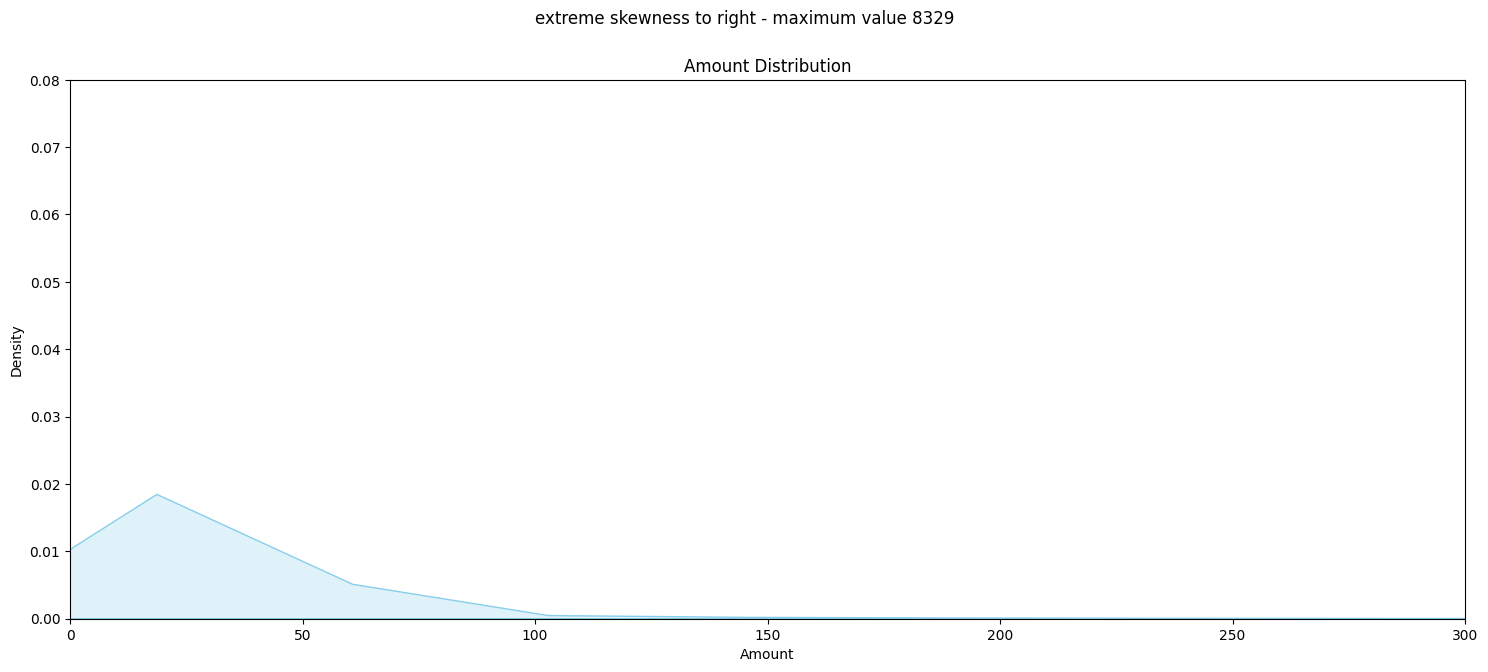

In [9]:
# Set the figure size
plt.figure(figsize=(18, 7))

# Create the density plot
sns.kdeplot(data['amount'], color='skyblue', fill=True)

# Set the x and y limits
plt.xlim(0, 300)
plt.ylim(0, 0.08)

# Set the labels and title
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Amount Distribution')
plt.suptitle('extreme skewness to right - maximum value 8329')

# Show the plot
plt.show()


In [10]:
sns.set_style("whitegrid")
# Calculate average amount spent for each gender, age, and category
gender = data.groupby('gender')['amount'].mean().reset_index().rename(columns={'gender': 'Value', 'amount': 'avg_spent'})
gender['Metric'] = 'Gender'

age = data.groupby('age')['amount'].mean().reset_index().rename(columns={'age': 'Value', 'amount': 'avg_spent'})
age['Metric'] = 'Age'

category = data.groupby('category')['amount'].mean().reset_index().rename(columns={'category': 'Value', 'amount': 'avg_spent'})
category['Metric'] = 'Category'

In [11]:
# Order the categories
data['amount_thresh'] = pd.Categorical(data['amount_thresh'], categories=['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '>3000'], ordered=True)

In [12]:
category

,Value,avg_spent,Metric
0,barsandrestaurants,43.462972,Category
1,contents,44.547571,Category
2,fashion,65.669814,Category
3,food,37.070752,Category
4,health,135.669381,Category
5,home,165.702586,Category
6,hotelservices,205.614249,Category
7,hyper,45.972229,Category
8,leisure,288.911303,Category
9,otherservices,135.881524,Category


In [13]:
gender

,Value,avg_spent,Metric
0,E,36.627623,Gender
1,F,39.213044,Gender
2,M,36.308094,Gender


In [14]:
age

,Value,avg_spent,Metric
0,0,46.602896,Age
1,1,37.544105,Age
2,2,38.366811,Age
3,3,37.886316,Age
4,4,38.201522,Age
5,5,36.426231,Age
6,6,36.865624,Age
7,7,36.627623,Age


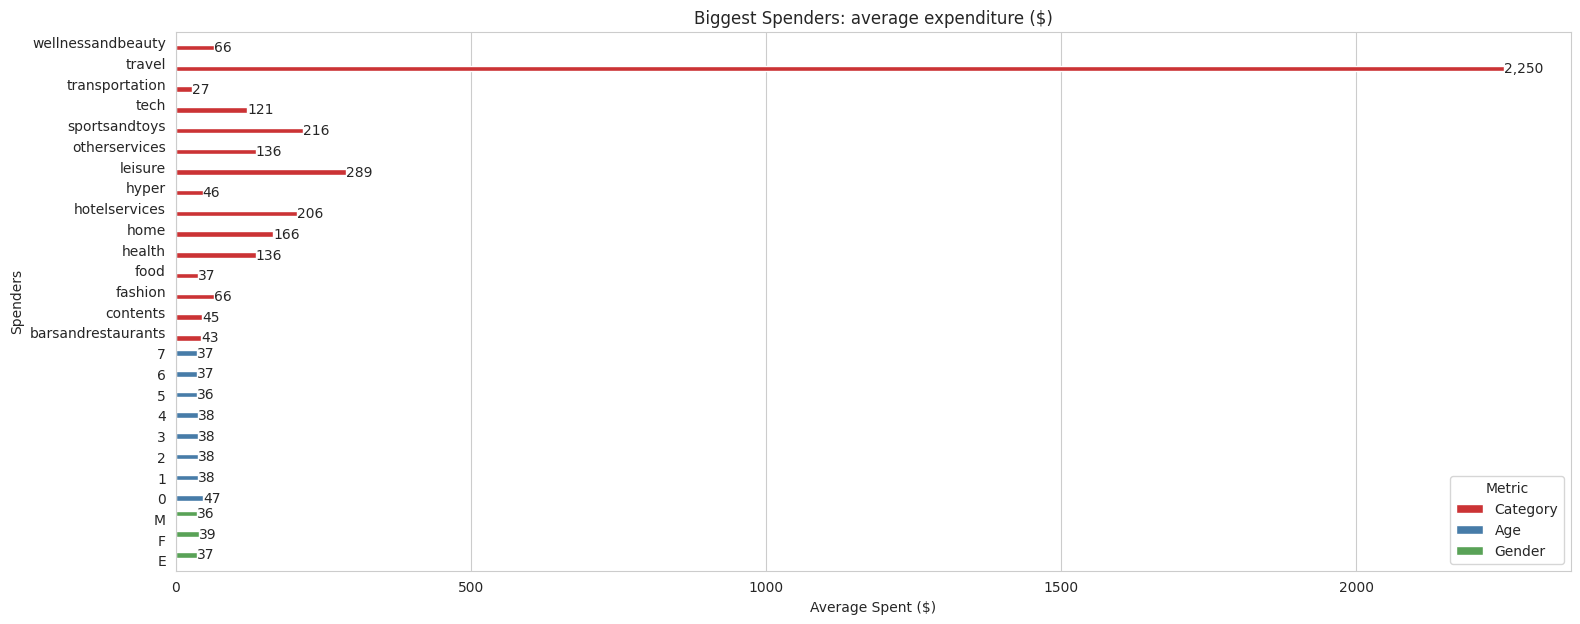

In [15]:
#@title Bigger spenders - average expenditure ($)
# Concatenate the dataframes
df = pd.concat([gender, age, category])

# Order the categories
df['Metric'] = pd.Categorical(df['Metric'], categories=['Category', 'Age', 'Gender'])

# Set the figure size
plt.figure(figsize=(18, 7))

# Create the bar plot with 'Set1' palette
sns.barplot(data=df, y='Value', x='avg_spent', hue='Metric', palette='Set1')

# Flip the coordinates
plt.gca().invert_yaxis()

# Add value labels
for p in plt.gca().patches:
    width = p.get_width()
    if np.isfinite(width):  # Add this check
        plt.text(width, p.get_y() + p.get_height() / 2, '{:,.0f}'.format(width), ha='left', va='center')

# Set labels and title
plt.xlabel('Average Spent ($)')
plt.ylabel('Spenders')
plt.title('Biggest Spenders: average expenditure ($)')


# Show the plot
plt.show()

In [16]:
data['fraud'].unique()

array([0, 1])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  if sys.path[0] == "":


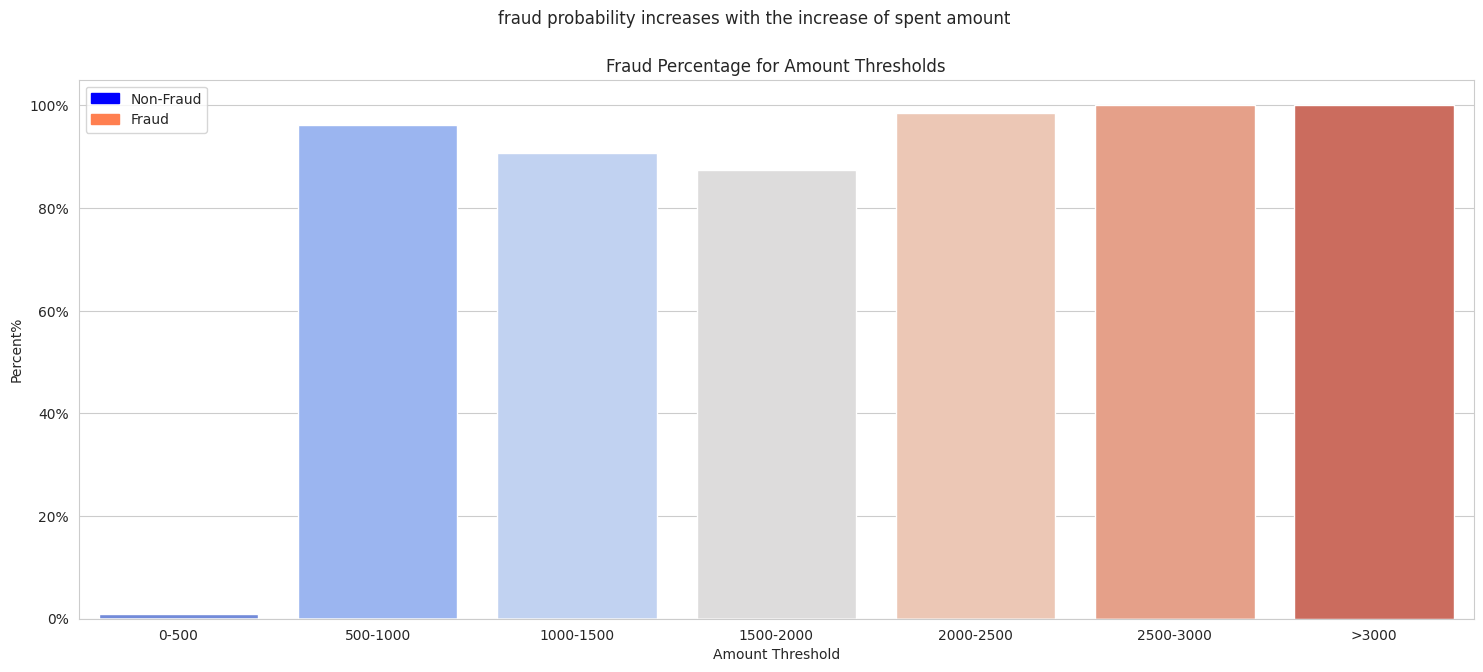

In [17]:
#@title Fraud Percentage for Spent Amount Thresholds
# Set the figure size
plt.figure(figsize=(18,7))

# Create a order for the categories
order = ["0-500", "500-1000", "1000-1500", "1500-2000", "2000-2500", "2500-3000", ">3000"]

# Create a bar plot
sns.barplot(x='amount_thresh', y='fraud',  hue='amount_thresh', data=data, ci=None, 
            estimator=lambda x: sum(x)*100.0/len(x) if len(x) != 0 else 0,
            order=order,
            palette='coolwarm', dodge=False)

# Flip the axes
#plt.gca().invert_xaxis()

# Format the y-axis to display percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Add labels and title
plt.xlabel('Amount Threshold')
plt.ylabel('Percent%')
plt.title('Fraud Percentage for Amount Thresholds')
plt.suptitle('fraud probability increases with the increase of spent amount')

# Add legend
fraud_patch = mpatches.Patch(color='blue', label='Non-Fraud')
non_fraud_patch = mpatches.Patch(color='coral', label='Fraud')
plt.legend(handles=[fraud_patch, non_fraud_patch])

# Display the plot
plt.show()

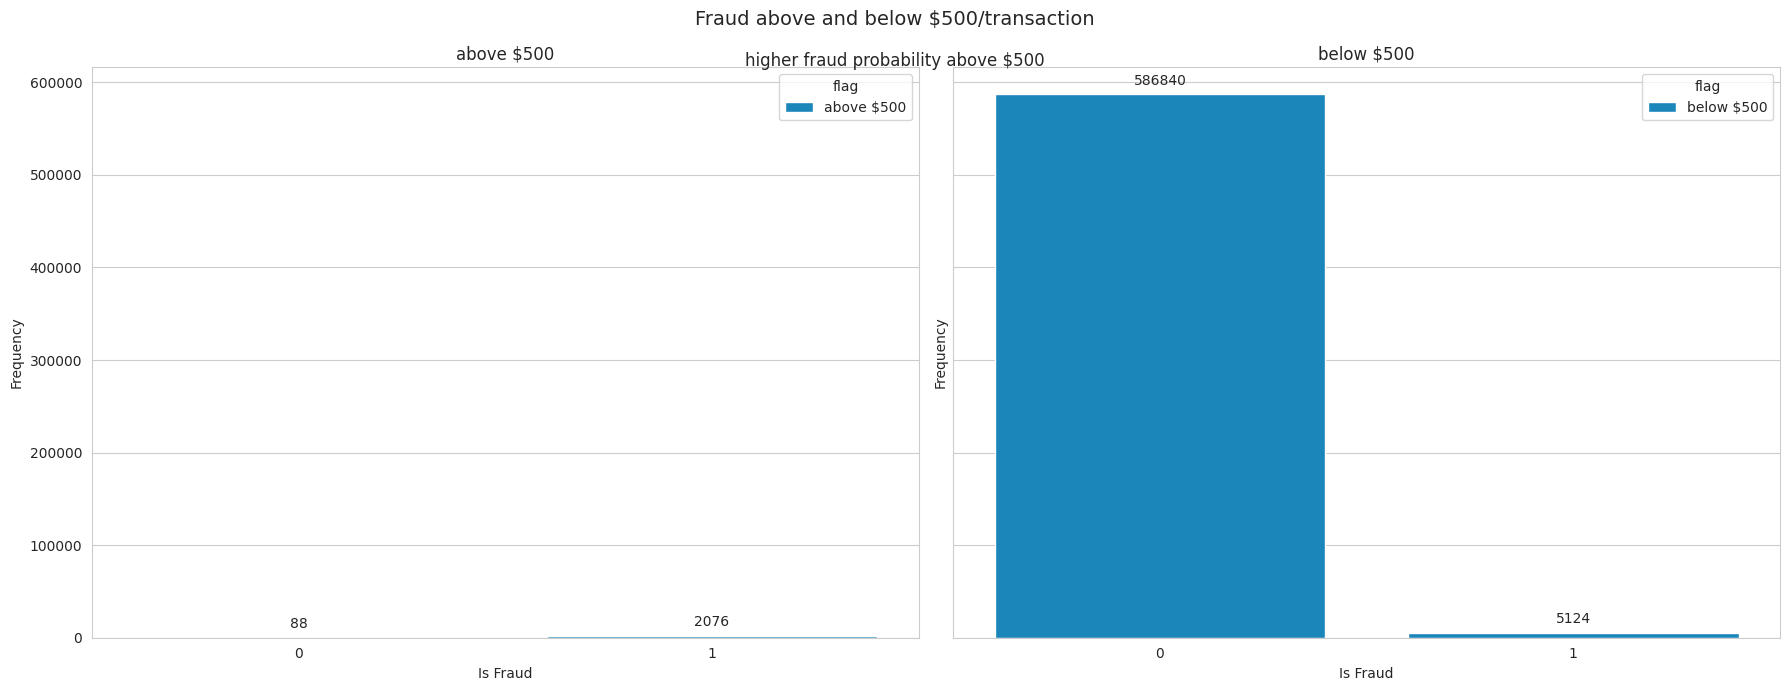

In [18]:
#@title Amount Distribution - Values above and below $500
# Create a new column 'flag' based on 'amount'
data['flag'] = data['amount'].apply(lambda x: 'below $500' if x <= 500 else 'above $500')

# Group by 'fraud' and 'flag' and calculate frequency
grouped_data = data.groupby(['fraud', 'flag']).size().reset_index(name='n')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Plot data
for i, (flag, group) in enumerate(grouped_data.groupby('flag')):
    ax = axes[i]
    sns.barplot(x='fraud', y='n', hue='flag', data=group, ax=ax, palette=['#008fd5', '#fc4f30'])
    
    # Add labels
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    size=10,
                    xytext = (0, 10),    # Adjust this value to shift the text position
                    textcoords = 'offset points')

    ax.set_title(flag)
    ax.set_xlabel('Is Fraud')
    ax.set_ylabel('Frequency')

# Set overall title and subtitle
fig.suptitle('Fraud above and below $500/transaction', fontsize=14)
plt.figtext(.5,.9,'higher fraud probability above $500', fontsize=12, ha='center')
plt.tight_layout()
plt.show()


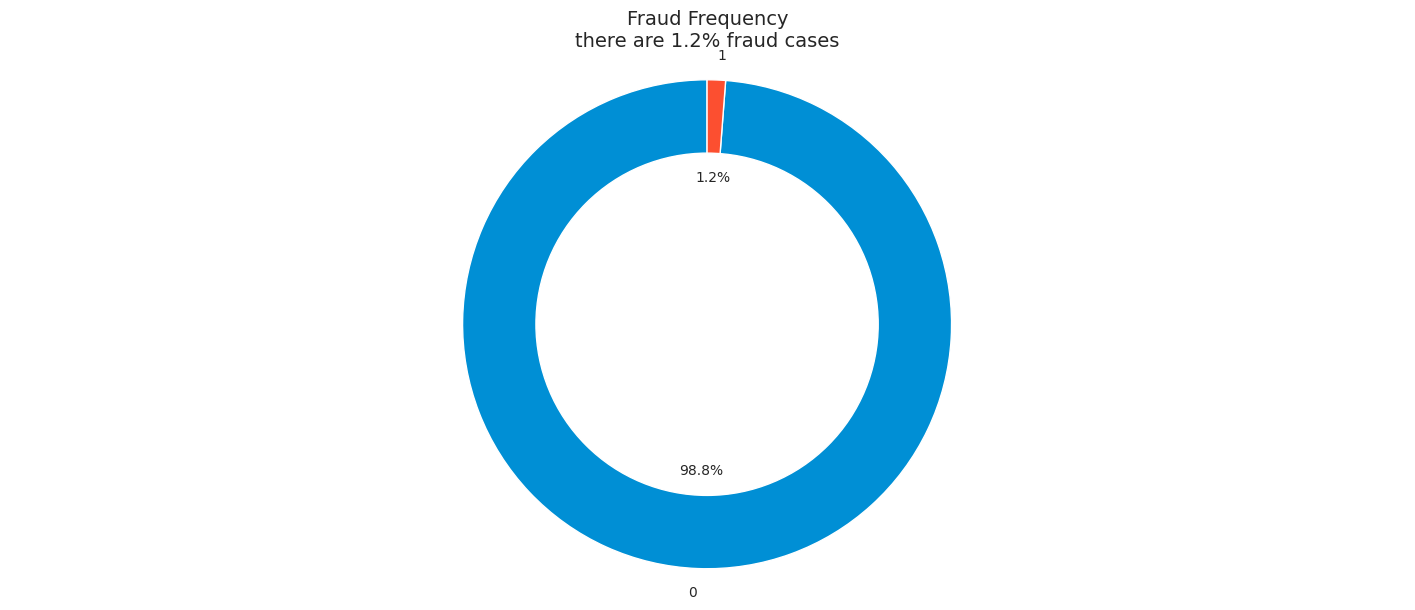

In [19]:
#@title Fraud Frequency
# Group by 'fraud' and calculate frequency
grouped_data = data.groupby('fraud').size().reset_index(name='n')

# Create a pie chart
fig, ax = plt.subplots(figsize=(18, 7))
ax.pie(grouped_data['n'], labels=grouped_data['fraud'], autopct='%1.1f%%', startangle=90, colors=['#008fd5', '#fc4f30'])

# Draw a circle at the center (to make it a donut chart)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add title
plt.title('Fraud Frequency\nthere are 1.2% fraud cases', fontsize=14, ha='center')
plt.show()

In [20]:
data

,step,customer,age,gender,merchant,category,amount,fraud,amount_thresh,flag
0,0,C1093826151,4,M,M348934600,transportation,4.55,0,0-500,below $500
1,0,C352968107,2,M,M348934600,transportation,39.68,0,0-500,below $500
2,0,C2054744914,4,F,M1823072687,transportation,26.89,0,0-500,below $500
3,0,C1760612790,3,M,M348934600,transportation,17.25,0,0-500,below $500
4,0,C757503768,5,M,M348934600,transportation,35.72,0,0-500,below $500
...,...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,M1823072687,transportation,20.53,0,0-500,below $500
594639,179,C650108285,4,F,M1823072687,transportation,50.73,0,0-500,below $500
594640,179,C123623130,2,F,M349281107,fashion,22.44,0,0-500,below $500
594641,179,C1499363341,5,M,M1823072687,transportation,14.46,0,0-500,below $500


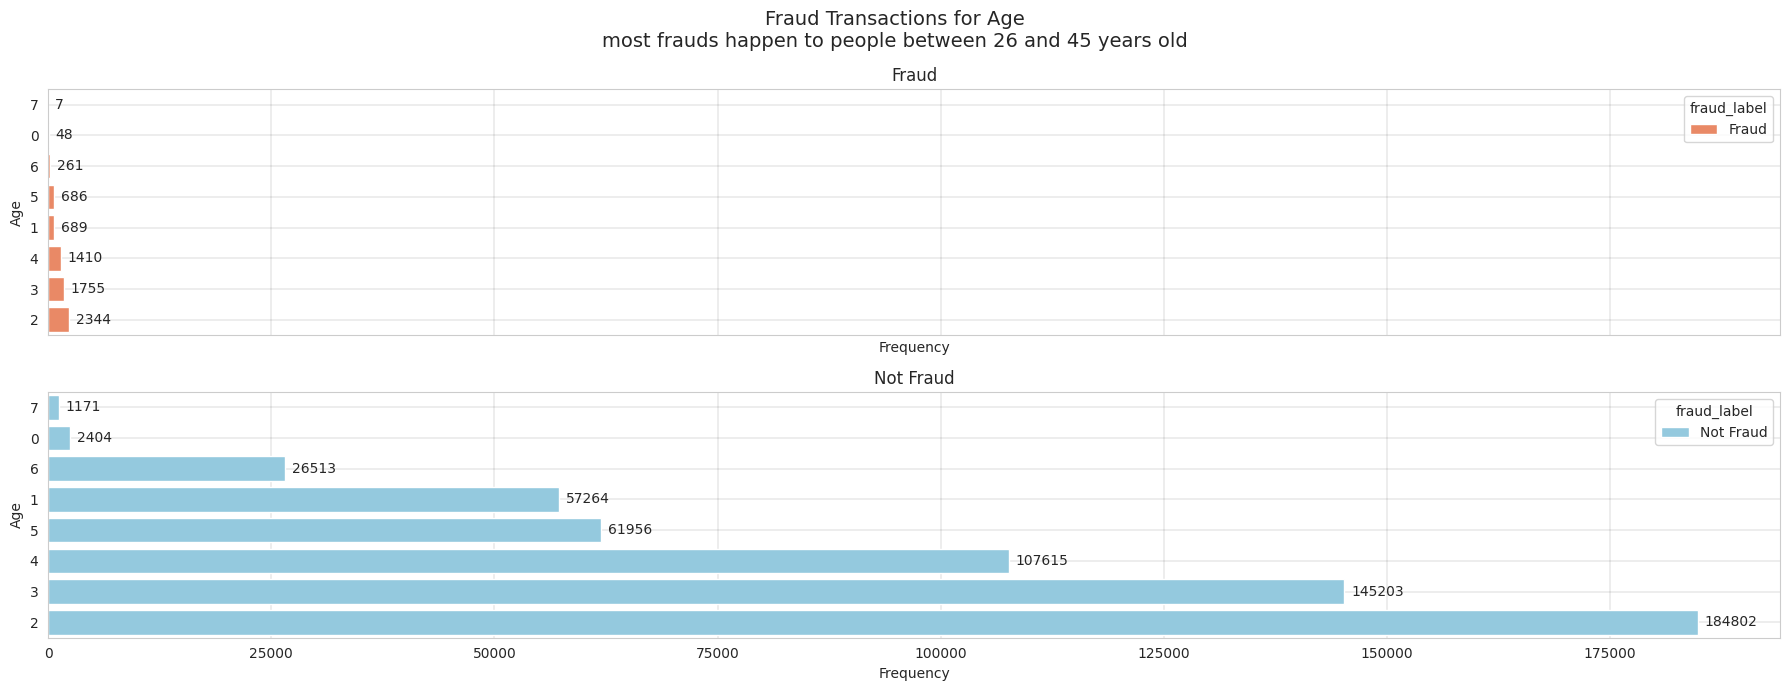

In [21]:
#@title Age Fraud Frequency
# Group by 'age' and 'fraud' and calculate frequency
grouped_data = data.groupby(['age', 'fraud']).size().reset_index(name='n')

# Sort by 'n'
grouped_data.sort_values('n', inplace=True)

# Create a factor 'fraud' column for labeling purposes
grouped_data['fraud_label'] = grouped_data['fraud'].map({0: 'Not Fraud', 1: 'Fraud'})

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 7), sharex=True)

# Set a vibrant color palette
palette = {'Not Fraud': 'skyblue', 'Fraud': 'coral'}

# Plot data
for i, (fraud_label, group) in enumerate(grouped_data.groupby('fraud_label')):
    ax = axes[i]
    sns.barplot(x='n', y='age', hue='fraud_label', data=group, ax=ax, palette=palette, dodge=False)
    ax.set_title(fraud_label)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Age')
    
    # Add labels
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.0f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha = 'left', va = 'center', 
                    size=10,
                    xytext = (5, 0),
                    textcoords = 'offset points')

    # Add grid
    ax.grid(True, which='both', color='black', linewidth=0.1)

# Set overall title and subtitle
plt.suptitle('Fraud Transactions for Age\nmost frauds happen to people between 26 and 45 years old', fontsize=14)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


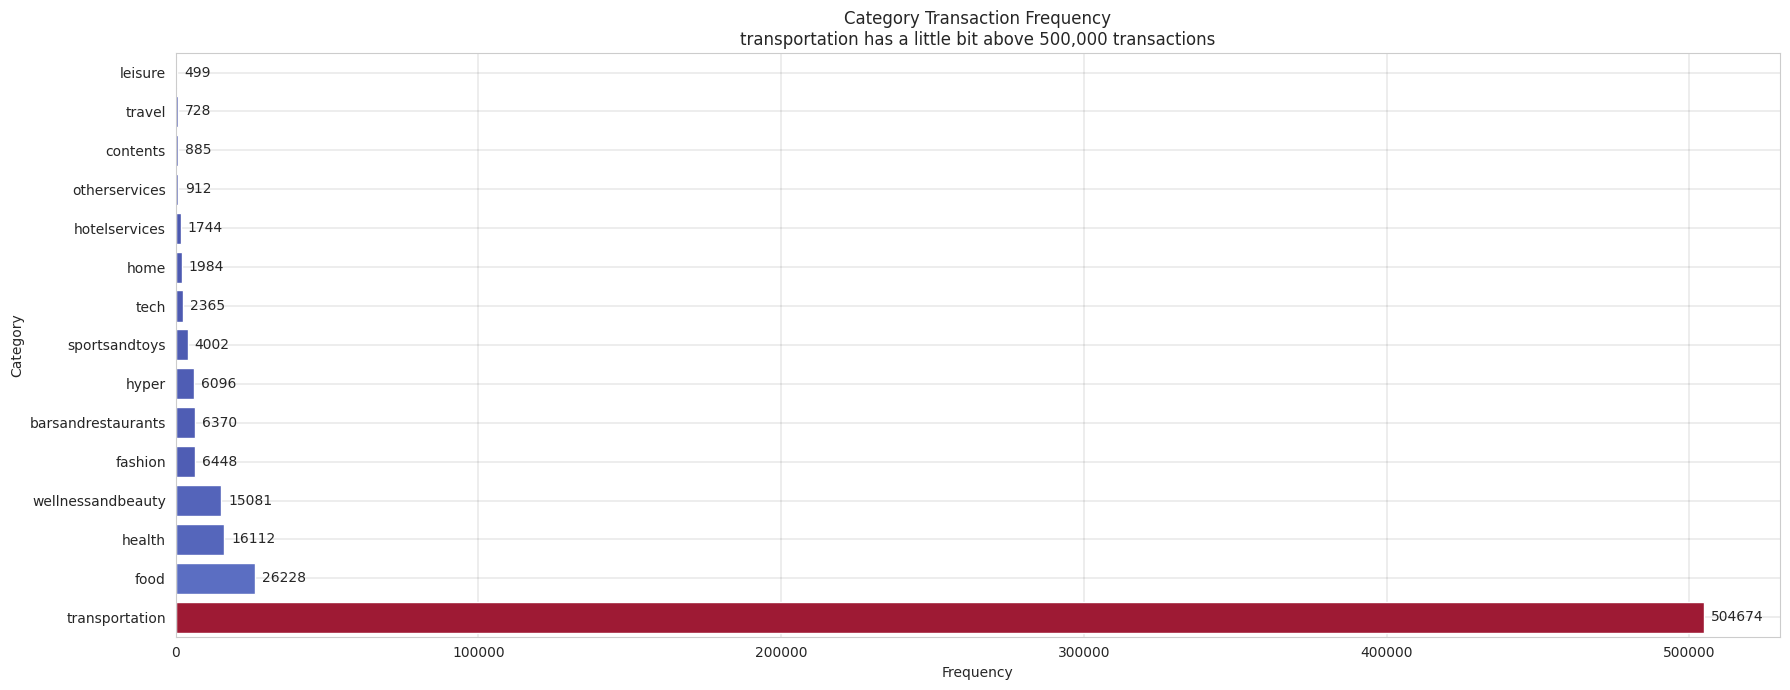

In [22]:
#@title Fraud in Spending Categories
# Filter out 'transportation' if need to see categories other than "transportation"

#filtered_data = data[data['category'] != 'transportation']

# Group by 'category' and calculate frequency
grouped_data = data.groupby('category').size().reset_index(name='n')

# Sort by 'n'
grouped_data.sort_values('n', inplace=True)

# Create a colormap for the gradient
cmap = plt.get_cmap('coolwarm')
colors = cmap(grouped_data['n'] / grouped_data['n'].max())

# Create a bar plot
plt.figure(figsize=(18,7))
bar_plot = sns.barplot(y='category', x='n', data=grouped_data, palette=colors, orient='h')

# Add labels
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.0f'), 
                      (p.get_width(), p.get_y() + p.get_height() / 2.), 
                      ha = 'left', va = 'center', 
                      size=10,
                      xytext = (5, 0),
                      textcoords = 'offset points')

# Add grid
plt.grid(True, which='both', color='black', linewidth=0.1)

# Set labels and title
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Category Transaction Frequency\ntransportation has a little bit above 500,000 transactions')

plt.tight_layout()
plt.show()


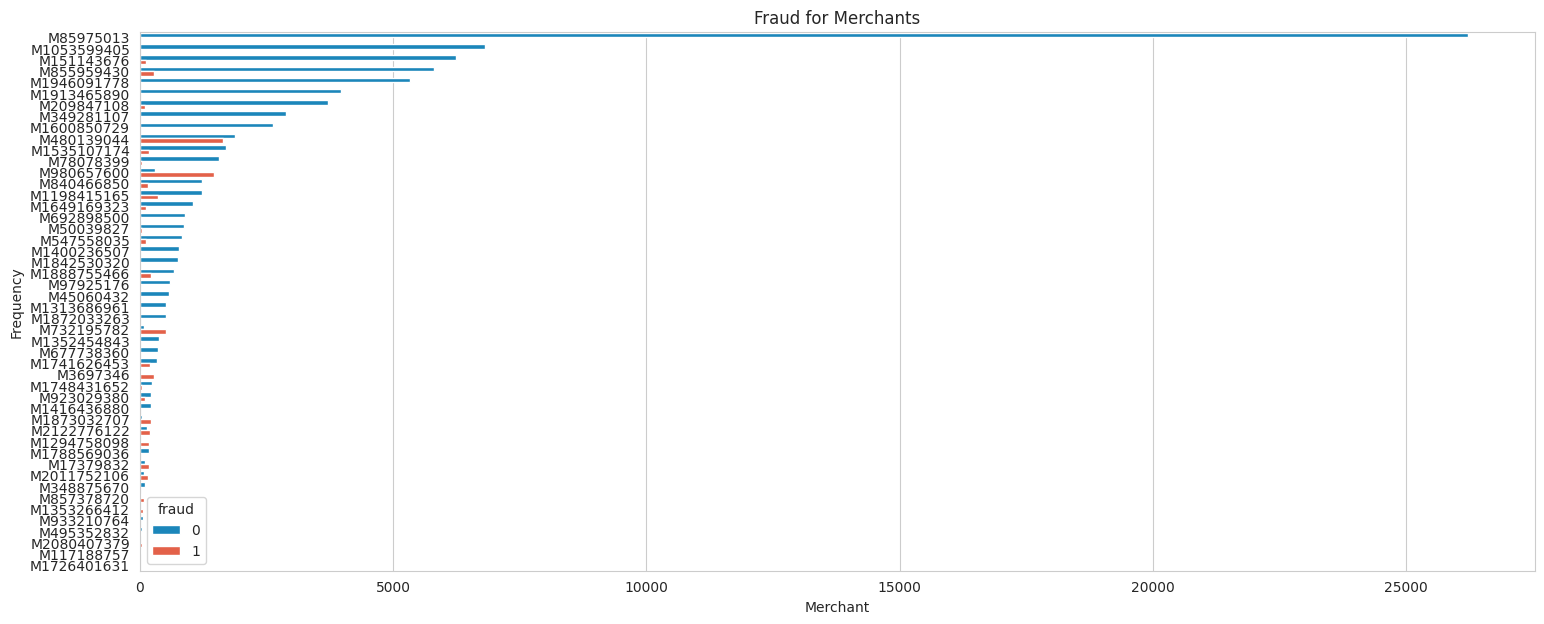

In [23]:
#@title Merchants and Fraud
# Group by 'fraud' and 'merchant' and calculate frequency
grouped_data = data.groupby(['fraud', 'merchant']).size().reset_index(name='n')

# Sort by 'n' in descending order
grouped_data.sort_values('n', ascending=False, inplace=True)

# Filter out certain merchants
grouped_data = grouped_data[~grouped_data['merchant'].isin(["M1823072687", "M348934600"])]

# Create a color palette
palette = {0: '#008fd5', 1: '#fc4f30'}

# Create a bar plot
plt.figure(figsize=(18,7))
sns.barplot(y='merchant', x='n', hue='fraud', data=grouped_data, orient='h', palette=palette)

# Add labels and title
plt.xlabel('Merchant')
plt.ylabel('Frequency')
plt.title('Fraud for Merchants')
plt.show()

In [24]:
# Define color schemes
colors_basketball = ["#F57E00", "#FFA90A", "#FFCE72", "#3AAFF9", "#0087DC", "#005991"]
colors_60s = ["#BF4402", "#94058E", "#005DD7", "#2690C3", "#F5C402", "#CE378E"]


In [25]:
# Remove quotes from the string columns
for col in ['customer', 'age', 'gender', 'merchant', 'category']:
    data[col] = data[col].str.replace(r'^"|"$', '', regex=True)

# Remove 'es_' from 'category'
data['category'] = data['category'].str.replace('es_', '')

# Remove rows where 'gender' is 'U'
data = data[data['gender'] != 'U']

# Replace 'U' in 'age' with '7'
data['age'].replace('U', '7', inplace=True)

# Create amount thresholds
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, pd.np.inf]
names = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '>3000']
data['amount_thresh'] = pd.cut(data['amount'], bins, labels=names)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


In [26]:
# Define function to draw confusion matrix
def draw_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)
    
    # Labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    
    # Classification report
    print(classification_report(y_true, y_pred, target_names=labels))


In [27]:
!pip install imblearn

In [28]:
#@title Classifying Fraud (Supervised Learning)
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import VotingClassifier # equivalent of caretEnsemble
from sklearn.decomposition import FactorAnalysis # equivalent of FactoMineR
# Python doesn't have a direct equivalent for factoextra
from sklearn.neighbors import NearestNeighbors # equivalent of RANN
# Python doesn't have a direct equivalent for NbClust
from joblib import Parallel, delayed # equivalent of doParallel
from imblearn.over_sampling import RandomOverSampler # equivalent of ROSE
from imblearn.over_sampling import SMOTE # equivalent of imbalance and smotefamily


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def draw_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    cm_report = classification_report(y_true, y_pred, output_dict=True)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.xticks([0.5,1.5], classes)
    plt.yticks([0.5,1.5], classes)

    for i, val in enumerate(['precision', 'recall', 'f1-score']):
        for j, _class in enumerate(classes):
            plt.text(j+1, i+3, f'{val}: {cm_report[_class][val]:.2f}', ha='center', va='center', color='black', bbox=dict(facecolor='white', edgecolor='black'))

    plt.text(1, 5, f'accuracy: {cm_report["accuracy"]:.2f}', ha='center', va='center', color='black', bbox=dict(facecolor='white', edgecolor='black'))
    plt.show()


In [30]:
# Create ID and Total Trans for Customer and Merchant
customer = data.groupby('customer').size().reset_index(name='customer_total_trans')
customer['customer_ID'] = range(1, len(customer) + 1)

merchant = data.groupby('merchant').size().reset_index(name='merchant_total_trans')
merchant['merchant_ID'] = range(1, len(merchant) + 1)

category = data.groupby('category').size().reset_index(name='category_total_trans')
category['category_ID'] = range(1, len(category) + 1)

amount_thresh = data.groupby('amount_thresh').size().reset_index(name='amount_thresh_total_trans')
amount_thresh['amount_thresh_ID'] = range(1, len(amount_thresh) + 1)


In [31]:
data['fraud']

0         0
1         0
2         0
3         0
4         0
         ..
594638    0
594639    0
594640    0
594641    0
594642    0
Name: fraud, Length: 594128, dtype: int64

In [32]:
# Add the 4 new variables and remove original ones
data = pd.merge(data, customer, on='customer', how='inner')
data = pd.merge(data, merchant, on='merchant', how='inner')
data = data.drop(columns=['customer', 'merchant'])

# Convert age type from str to float
data['age'] = data['age'].astype(float)

# Gender coding and type change from str to int
data['gender'] = data['gender'].map({'M': 1, 'F': 2}).fillna(3)

# Recode category and add total_category_trans column
data = pd.merge(data, category, on='category', how='inner')
data['category'] = data['category_ID']
data = data.drop(columns='category_ID')

# Recode amount_thresh
data = pd.merge(data, amount_thresh, on='amount_thresh', how='inner')
data['amount_thresh'] = data['amount_thresh_ID']
data = data.drop(columns='amount_thresh_ID')

# Add also for age and gender total_trans/age_total_trans' column indicates the total number of transactions associated with each age category.
age = data.groupby('age').size().reset_index(name='age_total_trans')
gender = data.groupby('gender').size().reset_index(name='gender_total_trans')

# Add new variables
data = pd.merge(data, age, on='age', how='inner')
data = pd.merge(data, gender, on='gender', how='inner')

# Transform the total_trans numbers into weights
total_freq = 591746
cols_to_transform = ['merchant_total_trans', 'category_total_trans', 'amount_thresh_total_trans', 'age_total_trans', 'gender_total_trans']
for col in cols_to_transform:
    data[col] = round((data[col] / total_freq) * 100, 5)


In [33]:
data

,step,age,gender,category,amount,fraud,amount_thresh,flag,customer_total_trans,customer_ID,merchant_total_trans,merchant_ID,category_total_trans,amount_thresh_total_trans,age_total_trans,gender_total_trans
0,0,4.0,1.0,13,4.55,0,1,below $500,167,211,34.69850,31,85.28558,100.02805,18.42311,45.35071
1,2,4.0,1.0,13,37.21,0,1,below $500,167,211,34.69850,31,85.28558,100.02805,18.42311,45.35071
2,3,4.0,1.0,13,31.63,0,1,below $500,167,211,34.69850,31,85.28558,100.02805,18.42311,45.35071
3,4,4.0,1.0,13,35.86,0,1,below $500,167,211,34.69850,31,85.28558,100.02805,18.42311,45.35071
4,6,4.0,1.0,13,39.58,0,1,below $500,167,211,34.69850,31,85.28558,100.02805,18.42311,45.35071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594071,29,7.0,3.0,12,72.13,0,1,below $500,179,3937,0.12674,20,0.39966,100.02805,0.19890,0.19890
594072,92,7.0,3.0,12,158.10,0,1,below $500,99,1881,0.12674,20,0.39966,100.02805,0.19890,0.19890
594073,73,7.0,3.0,12,406.41,0,1,below $500,124,2368,0.12674,20,0.39966,100.02805,0.19890,0.19890
594074,136,7.0,3.0,9,462.97,1,1,below $500,14,468,0.03228,4,0.08433,100.02805,0.19890,0.19890


In [34]:
data['fraud'].unique()

array([0, 1])

In [35]:
# Remove 'step' column
data = data.drop(columns='step')

# Move the 'fraud' column to the start of the DataFrame
fraud = data['fraud']
data.drop(labels=['fraud'], axis=1, inplace = True)
data.insert(0, 'fraud', fraud)

# Create Dummy Variables for Gender, Age, Category and Amount_Thresh
data = pd.get_dummies(data, columns=['age', 'gender', 'category', 'amount_thresh'])

# Recode 'fraud' column
data['fraud'] = data['fraud'].map({1: 'F', 0: 'NF'})

# Print dimensions of the DataFrame
print(data.shape)


(594076, 44)


In [36]:
data['fraud']

0         NF
1         NF
2         NF
3         NF
4         NF
          ..
594071    NF
594072    NF
594073    NF
594074     F
594075     F
Name: fraud, Length: 594076, dtype: object

In [37]:
print(data['fraud'].unique())


['NF' 'F']


In [38]:
#@title Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Find the columns with one-hot encoding
one_hot_columns = [col for col in data.columns if any(x in col for x in ['age_', 'gender_', 'category_', 'amount_thresh_'])]

# Selecting columns for PCA
data_for_pca = data.loc[:, one_hot_columns]

# Standardizing the features
data_for_pca = StandardScaler().fit_transform(data_for_pca)

# PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(data_for_pca)

# Eigenvalues (explained variance ratios of the Principal Components)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)


[9.67628439e-02 8.13641141e-02 7.20405989e-02 6.14830745e-02
 5.33517807e-02 4.04780620e-02 3.62830384e-02 3.27192703e-02
 3.00978924e-02 2.88339830e-02 2.82699730e-02 2.79699402e-02
 2.75663145e-02 2.74823897e-02 2.73361314e-02 2.73158821e-02
 2.72057684e-02 2.71322507e-02 2.71157751e-02 2.70698501e-02
 2.70577939e-02 2.70402342e-02 2.70303956e-02 2.70173311e-02
 2.69732322e-02 2.61752067e-02 2.41950796e-02 6.63179348e-03
 2.68718812e-30 1.04504864e-30 3.65729312e-31 3.15450666e-31
 2.48118185e-31 1.45673269e-31 1.09443156e-31 5.45312797e-32
 6.41776410e-33]


In [39]:
# your array of explained variances and eigenvalues
explained_variance = np.array([9.67628439e-02, 8.13641141e-02, 7.20405989e-02, 6.14830745e-02,
                               5.33517807e-02])  # take only the first 5 elements for example

eigenvalues = pca.explained_variance_[:5]  # assuming pca is your PCA model

cumulative_explained_variance = np.cumsum(explained_variance)

# Create DataFrame
df = pd.DataFrame({
    'eigenvalue': eigenvalues,
    'variance.percent': explained_variance * 100,  # to get it in percentage form
    'cumulative.variance.percent': cumulative_explained_variance * 100  # to get it in percentage form
}, index=[f'Dim.{i}' for i in range(1, len(eigenvalues)+1)])

print(df)


       eigenvalue  variance.percent  cumulative.variance.percent
Dim.1    3.580231          9.676284                     9.676284
Dim.2    3.010477          8.136411                    17.812696
Dim.3    2.665507          7.204060                    25.016756
Dim.4    2.274878          6.148307                    31.165063
Dim.5    1.974019          5.335178                    36.500241


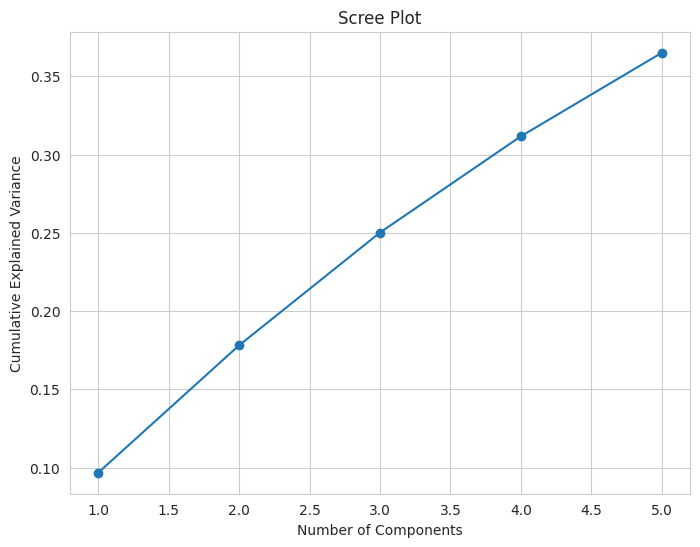

In [40]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance)+1), cumulative_explained_variance, 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Naturally we see the increase in components lead to increased cumulative variance

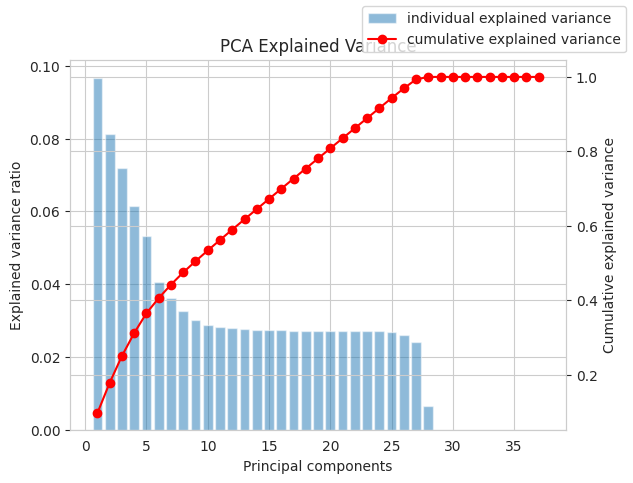

In [41]:
#@title Visual - PCA
# Your array of explained variances
explained_variance = np.array([9.67628439e-02, 8.13641141e-02, 7.20405989e-02, 6.14830745e-02,
                               5.33517807e-02, 4.04780620e-02, 3.62830384e-02, 3.27192703e-02,
                               3.00978924e-02, 2.88339830e-02, 2.82699730e-02, 2.79699402e-02,
                               2.75663145e-02, 2.74823897e-02, 2.73361314e-02, 2.73158821e-02,
                               2.72057684e-02, 2.71322507e-02, 2.71157751e-02, 2.70698501e-02,
                               2.70577939e-02, 2.70402342e-02, 2.70303956e-02, 2.70173311e-02,
                               2.69732322e-02, 2.61752067e-02, 2.41950796e-02, 6.63179348e-03,
                               2.67488114e-30, 1.09747931e-30, 4.03582407e-31, 2.68073754e-31,
                               2.50128217e-31, 9.55342072e-32, 3.96982047e-32, 1.78434493e-32,
                               1.45371848e-34])

# Number of components
n_components = len(explained_variance)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Create figure
fig, ax1 = plt.subplots()

# Create bar plot (individual explained variance)
ax1.bar(range(1, n_components+1), explained_variance, alpha=0.5, align='center', label='individual explained variance')

# Create line plot (cumulative explained variance)
ax2 = ax1.twinx()
ax2.plot(range(1, n_components+1), cumulative_explained_variance, 'r-', marker='o', label='cumulative explained variance')

# Add labels and title
ax1.set_ylabel('Explained variance ratio')
ax2.set_ylabel('Cumulative explained variance')
ax1.set_xlabel('Principal components')
plt.title('PCA Explained Variance')

# Add legend
fig.legend(loc="upper right")

# Show plot
plt.show()


In [42]:
# Read in the data
data = pd.read_csv("bs140513_032310.csv")
data

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [43]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = data.loc[data.fraud == 1] 
df_non_fraud = data.loc[data.fraud == 0]


In [44]:
# Create two dataframes with fraud and non-fraud data 
pd.concat([data.groupby('category')['amount'].mean(),data.groupby('category')['amount'].mean(),\
           data.groupby('category')['fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Percent(%)
category,,,
'es_transportation',26.958187,26.958187,0.000000
'es_food',37.070405,37.070405,0.000000
'es_barsandrestaurants',43.461014,43.461014,1.882944
'es_contents',44.547571,44.547571,0.000000
'es_hyper',45.970421,45.970421,4.591669
'es_wellnessandbeauty',65.511221,65.511221,4.759380
'es_fashion',65.666642,65.666642,1.797335
'es_tech',120.947937,120.947937,6.666667
'es_health',135.621367,135.621367,10.512614


In [45]:
#The overall result of this code is a DataFrame that shows the percentage of fraud cases for each age, sorted by the fraud percentage in ascending order.

print((data.groupby('age')['fraud'].mean()*100).reset_index().rename(columns={'age':'Age',
                                                                              'fraud' : 'Fraud Percent'}).sort_values(by='Fraud Percent'))

   Age  Fraud Percent
7  'U'       0.594228
6  '6'       0.974826
5  '5'       1.095112
1  '1'       1.185254
3  '3'       1.192815
2  '2'       1.251401
4  '4'       1.293281
0  '0'       1.957586


In [46]:
#@title Data Preprocessing
# only one unique zipCode values so we will drop them.

print("Unique zipCodeOri values: ",data.zipcodeOri.nunique())
print("Unique zipMerchant values: ",data.zipMerchant.nunique())

# dropping zipcodeori and zipMerchant since they have only one unique value
data_reduced = data.drop(['zipcodeOri','zipMerchant'],axis=1)

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


In [47]:
data_reduced.columns

Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

In [48]:
# turning object columns type to categorical for easing the transformation process
col_categorical = data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_reduced[col] = data_reduced[col].astype('category')
    
# categorical values ==> numeric values
data_reduced[col_categorical] = data_reduced[col_categorical].apply(lambda x: x.cat.codes)
data_reduced.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


In [49]:
#define our independent variable (X) and dependant/target variable y 
X = data_reduced.drop(['fraud'],axis=1)
y = data['fraud']
print(X.head(),"\n")
print(y.head())

   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72 

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


In [50]:
y[y==1].count()

7200

In [51]:
# set a seed for reproducibility
np.random.seed(123)

# assuming 'data' is your DataFrame and 'fraud' is a column in that DataFrame
fraud_data = data[data['fraud'] == 'F']

# print the dimension of fraud_data DataFrame
print(fraud_data.shape)

(0, 10)


In [52]:
#@title Oversampling with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_res = pd.DataFrame(y_res)
print(y_res['fraud'].value_counts())

0    587443
1    587443
Name: fraud, dtype: int64


In [54]:
# I won't do cross validation since we have a lot of instances
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42,shuffle=True,stratify=y_res)


In [55]:
# %% Function for plotting ROC_AUC curve

def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [56]:
# The base score should be better than predicting always non-fraduelent
print("Base accuracy score we must beat is: ", 
      df_non_fraud.fraud.count()/ 
      np.add(df_non_fraud.fraud.count(),
             df_fraud.fraud.count()) * 100)

Base accuracy score we must beat is:  98.7891894800746


In [57]:
#@title K-Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=1)

knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)

print("Classification Report for K-Nearest Neighbours: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of K-Nearest Neigbours: \n", confusion_matrix(y_test, y_pred))

Classification Report for K-Nearest Neighbours: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    176233
           1       0.98      1.00      0.99    176233

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

Confusion Matrix of K-Nearest Neigbours: 
 [[171999   4234]
 [   362 175871]]


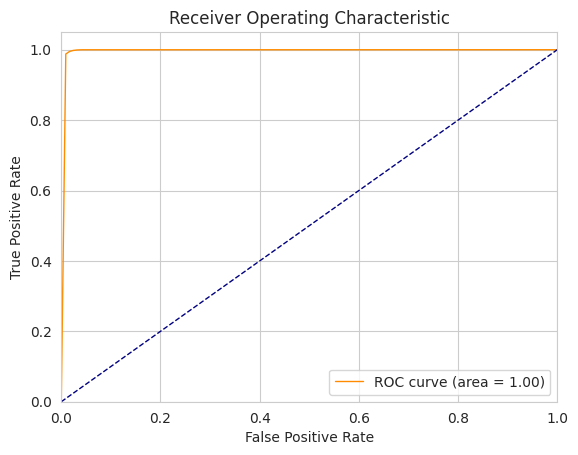

In [58]:
#@title K-Neighbours Classifier - Visual
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the roc curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished


Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    176233
           1       0.97      0.99      0.98    176233

    accuracy                           0.98    352466
   macro avg       0.98      0.98      0.98    352466
weighted avg       0.98      0.98      0.98    352466



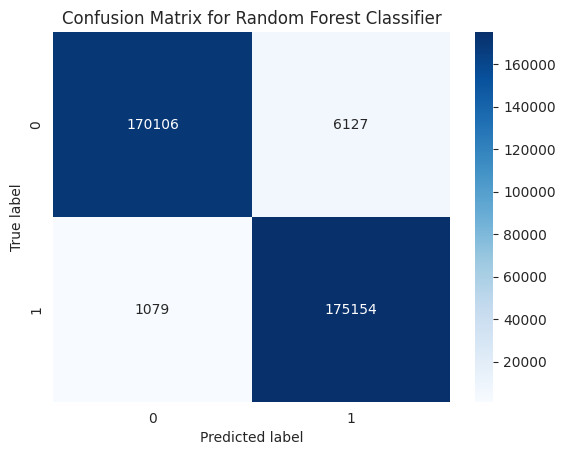

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished


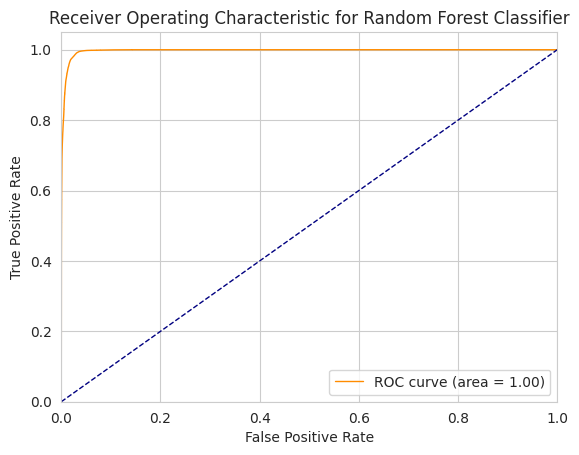

In [59]:
#@title Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced")

rf_clf.fit(X_train, y_train.values.ravel())
y_pred = rf_clf.predict(X_test)

print("Classification Report for Random Forest Classifier: \n", classification_report(y_test, y_pred))

# Plotting confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

Classification Report for XGBoost: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    176233
           1       0.99      1.00      0.99    176233

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466



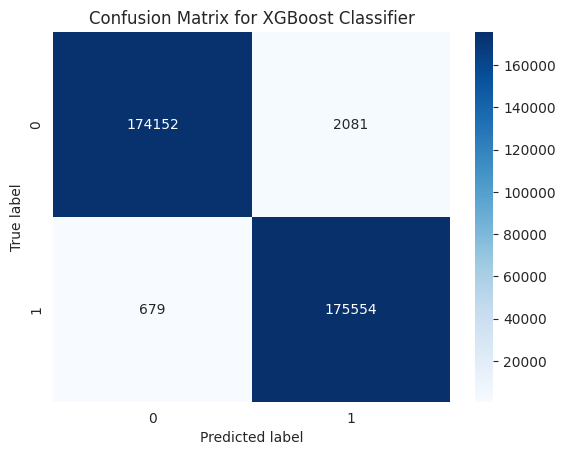

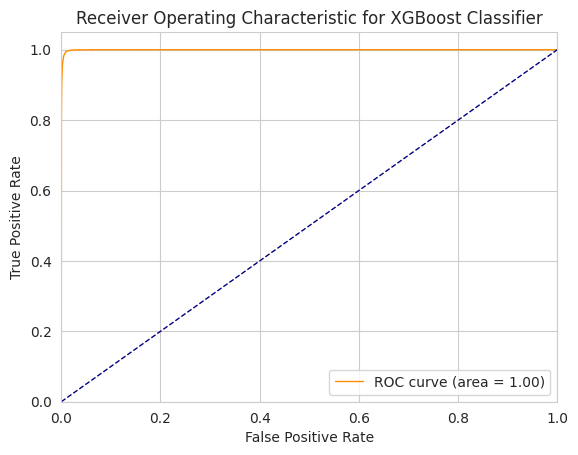

In [60]:
#@title XGBoost classifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
import xgboost as xgb

# XGBoost classifier
XGBoost_CLF = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, 
                                objective="binary:logistic", booster='gbtree', 
                                n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                                subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                                scale_pos_weight=1, base_score=0.5, random_state=42, verbosity=1)


XGBoost_CLF.fit(X_train, y_train.values.ravel())

y_pred = XGBoost_CLF.predict(X_test)

print("Classification Report for XGBoost: \n", classification_report(y_test, y_pred))

# Plotting confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGBoost_CLF.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, XGBoost_CLF.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()


In [61]:
#@title  #Compare the results of the models with and without SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'X' and 'y' are your features and target in the imbalanced dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
# Random Forest Classifier
rf_clf_orig = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, verbose=1, class_weight="balanced")
rf_clf_orig.fit(X_train_orig, y_train_orig.values.ravel())
y_pred_orig = rf_clf_orig.predict(X_test_orig)

print("Classification Report for Random Forest Classifier without SMOTE: \n", classification_report(y_test_orig, y_pred_orig))
print("Confusion Matrix of Random Forest Classifier without SMOTE: \n", confusion_matrix(y_test_orig, y_pred_orig))
# plot_roc_auc(y_test_orig, rf_clf_orig.predict_proba(X_test_orig)[:,1])  # Uncomment if you want to plot ROC curve

# XGBoost Classifier
XGBoost_CLF_orig = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, 
                                objective="binary:logistic", booster='gbtree', 
                                n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                                subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                                scale_pos_weight=1, base_score=0.5, random_state=42, verbosity=1)

XGBoost_CLF_orig.fit(X_train_orig, y_train_orig.values.ravel())
y_pred_orig = XGBoost_CLF_orig.predict(X_test_orig)

print("Classification Report for XGBoost without SMOTE: \n", classification_report(y_test_orig, y_pred_orig))
print("Confusion Matrix of XGBoost without SMOTE: \n", confusion_matrix(y_test_orig, y_pred_orig))
# plot_roc_auc(y_test_orig, XGBoost_CLF_orig.predict_proba(X_test_orig)[:,1])  # Uncomment if you want to plot ROC curve


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


Classification Report for Random Forest Classifier without SMOTE: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    176277
           1       0.23      0.99      0.38      2116

    accuracy                           0.96    178393
   macro avg       0.62      0.97      0.68    178393
weighted avg       0.99      0.96      0.97    178393

Confusion Matrix of Random Forest Classifier without SMOTE: 
 [[169466   6811]
 [    31   2085]]
Classification Report for XGBoost without SMOTE: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    176277
           1       0.91      0.79      0.85      2116

    accuracy                           1.00    178393
   macro avg       0.96      0.89      0.92    178393
weighted avg       1.00      1.00      1.00    178393

Confusion Matrix of XGBoost without SMOTE: 
 [[176121    156]
 [   447   1669]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


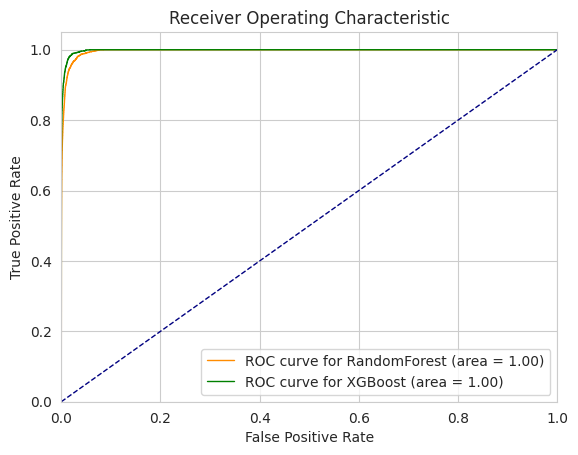

In [62]:
# Define the classifiers
rf_clf_orig = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, verbose=1, class_weight="balanced")
XGBoost_CLF_orig = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, 
                                      objective="binary:logistic", booster='gbtree', 
                                      n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                                      subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                                      scale_pos_weight=1, base_score=0.5, random_state=42, verbosity=1)

# Fit the classifiers
rf_clf_orig.fit(X_train_orig, y_train_orig.values.ravel())
XGBoost_CLF_orig.fit(X_train_orig, y_train_orig.values.ravel())

# Plotting ROC curve
plt.figure()

# ROC curve for RandomForest
fpr, tpr, thresholds = roc_curve(y_test_orig, rf_clf_orig.predict_proba(X_test_orig)[:,1])
roc_auc = roc_auc_score(y_test_orig, rf_clf_orig.predict_proba(X_test_orig)[:,1])
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve for RandomForest (area = %0.2f)' % roc_auc)

# ROC curve for XGBoost
fpr, tpr, thresholds = roc_curve(y_test_orig, XGBoost_CLF_orig.predict_proba(X_test_orig)[:,1])
roc_auc = roc_auc_score(y_test_orig, XGBoost_CLF_orig.predict_proba(X_test_orig)[:,1])
plt.plot(fpr, tpr, color='green', lw=1, label='ROC curve for XGBoost (area = %0.2f)' % roc_auc)

# Reference line
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
